In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [3]:
with open('/home/jupyter/results_new.json', 'r') as fp:
    results = json.load(fp)
    male_tpr = np.array(results['male_tpr'])
    male_fpr = np.array(results['male_fpr'])
    female_tpr = np.array(results['female_tpr'])
    female_fpr = np.array(results['female_fpr'])
    male_thresholds = np.array(results['male_thresholds'])
    female_thresholds = np.array(results['female_thresholds'])

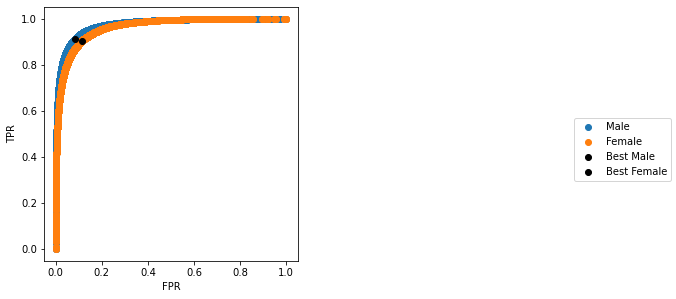

In [4]:
best_male = np.argmax(male_tpr - male_fpr)
best_female = np.argmax(female_tpr - female_fpr)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.scatter(male_fpr, male_tpr, label='Male')
ax.scatter(female_fpr, female_tpr, label='Female')
ax.scatter(male_fpr[best_male], male_tpr[best_male], marker='o', color='black', label='Best Male')
ax.scatter(female_fpr[best_female], female_tpr[best_female], marker='o', color='black', label='Best Female')
ax.set_aspect(1)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
fig.legend(loc='center right')
plt.show()

In [5]:
female_thresholds[best_female]

-0.9540587067604065

In [6]:
male_thresholds[best_male]

-0.961061418056488

In [7]:
corres_f_idx = female_thresholds.size - np.searchsorted(female_thresholds[::-1], male_thresholds[best_male], side="right")

In [16]:
female_thresholds

array([ 0.54973137, -0.45026863, -0.63686866, ..., -1.38935709,
       -1.38976276, -1.44067478])

In [9]:
female_fpr[best_female], female_tpr[best_female]

(0.11248993828816743, 0.9043131204722297)

In [10]:
female_fpr[corres_f_idx], female_tpr[corres_f_idx]

(0.12523477327609336, 0.9143077542259189)

In [11]:
corres_m_idx = male_thresholds.size - np.searchsorted(male_thresholds[::-1], female_thresholds[best_female], side="right")

In [12]:
male_fpr[best_male], male_tpr[best_male]

(0.08221565507312267, 0.9100553156020308)

In [13]:
male_fpr[corres_m_idx], male_tpr[corres_m_idx]

(0.07293324240357657, 0.8994847313783436)

In [14]:
metrics.auc(male_fpr, male_tpr)

0.9725159091331507

In [15]:
metrics.auc(female_fpr, female_tpr)

0.96272171761781